In [1]:
import pandas as pd

## Pandas

Pandas ima dva glavna tipa podataka Series i DataFrame. Series je niz, pri cemu mozemo da postavimo i custom indexe, dok se DataFrame koristi za tabelarne podatke i funckionise slicno kao matrica.

In [3]:
x = pd.Series([1,2,3,4], index=['a', 'b', 'c', 'd'])
x

a    1
b    2
c    3
d    4
dtype: int64

In [5]:
y = pd.Series([5,6,7,8])
y

0    5
1    6
2    7
3    8
dtype: int64

In [7]:
x+y # Sabiranje ne uspeva jer se indeksi razlikuju, a sabiranje se vrsi po njima

a   NaN
b   NaN
c   NaN
d   NaN
0   NaN
1   NaN
2   NaN
3   NaN
dtype: float64

In [9]:
# Nama nije ni toliko bitan series bitniji nam je DataFrame
pd.DataFrame([[1,2,3], [4,5,6]])

,0,1,2
0,1,2,3
1,4,5,6


In [11]:
df = pd.DataFrame([['pera', 'peric', 23], ['ana', 'anic', 26]], columns=['ime', 'prezime', 'godine'])
df

,ime,prezime,godine
0,pera,peric,23
1,ana,anic,26


In [12]:
df['ime']

0    pera
1     ana
Name: ime, dtype: object

In [13]:
type(df['ime'])

pandas.core.series.Series

In [15]:
df[['ime', 'prezime']]

,ime,prezime
0,pera,peric
1,ana,anic


In [16]:
type(df[['ime', 'prezime']])

pandas.core.frame.DataFrame

In [17]:
df['ime'][0]

'pera'

In [18]:
df.iloc[0,1]

'peric'

In [19]:
df.iloc[0, :]

ime         pera
prezime    peric
godine        23
Name: 0, dtype: object

In [20]:
df.iloc[0:, -1]

0    23
1    26
Name: godine, dtype: int64

In [21]:
df['godine'] > 25

0    False
1     True
Name: godine, dtype: bool

In [22]:
df[df['godine'] > 25]

,ime,prezime,godine
1,ana,anic,26


In [24]:
df.dropna() # Dropuje sve redove koje imaju NaN ili null ... itd 

,ime,prezime,godine
0,pera,peric,23
1,ana,anic,26


In [25]:
df.fillna(df['godine'].mean())

,ime,prezime,godine
0,pera,peric,23
1,ana,anic,26


In [26]:
df = pd.read_csv('iris.csv')

In [27]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [28]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [29]:
df.shape

(150, 5)

In [31]:
df.isna().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [33]:
y = df['species']

In [34]:
feature_names = df.columns.to_list()[:-1]

In [35]:
X = df[feature_names]

In [36]:
X.shape

(150, 4)

In [37]:
y.shape

(150,)

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) 

In [41]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [42]:
y_test_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [44]:
print(accuracy_score(y_test, y_test_pred))
print()
print(confusion_matrix(y_test, y_test_pred))
print()
print(classification_report(y_test, y_test_pred))

0.9777777777777777

[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [45]:
from sklearn.tree import plot_tree

In [46]:
print(model.classes_)
print(model.feature_importances_)

['setosa' 'versicolor' 'virginica']
[0.         0.01428571 0.55546218 0.4302521 ]


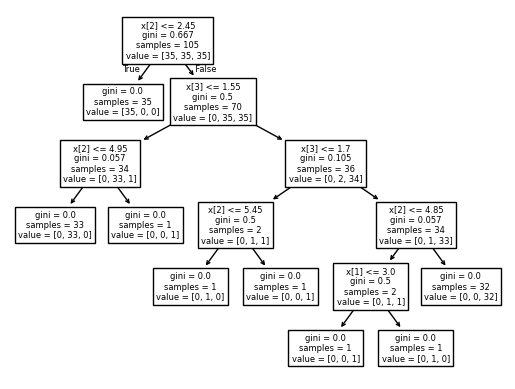

In [48]:
_ = plot_tree(model)

In [49]:
import matplotlib.pyplot as plt

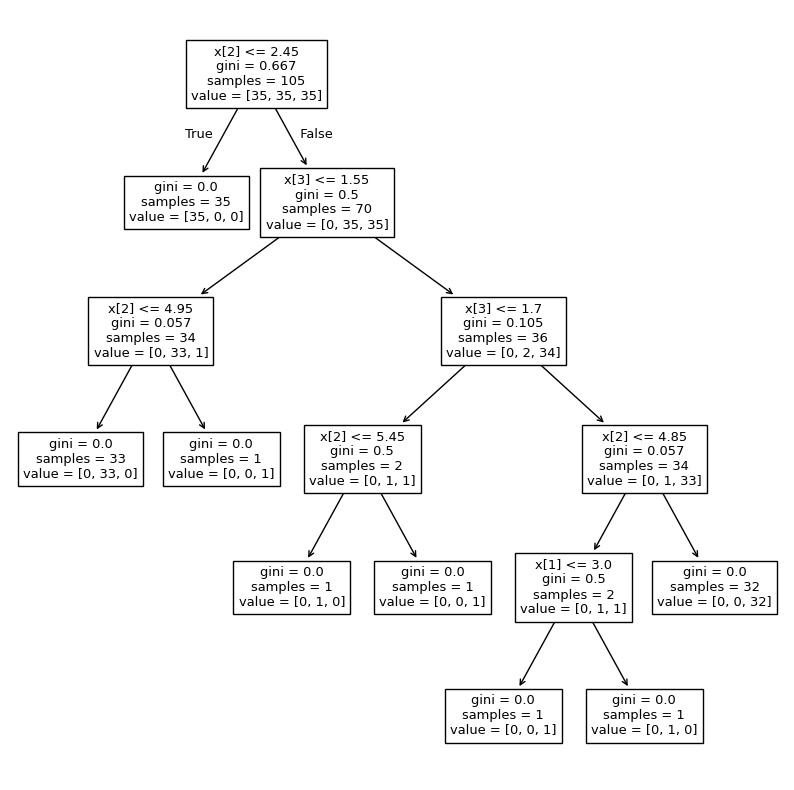

In [50]:
plt.figure(figsize=(10, 10))
_ = plot_tree(model)

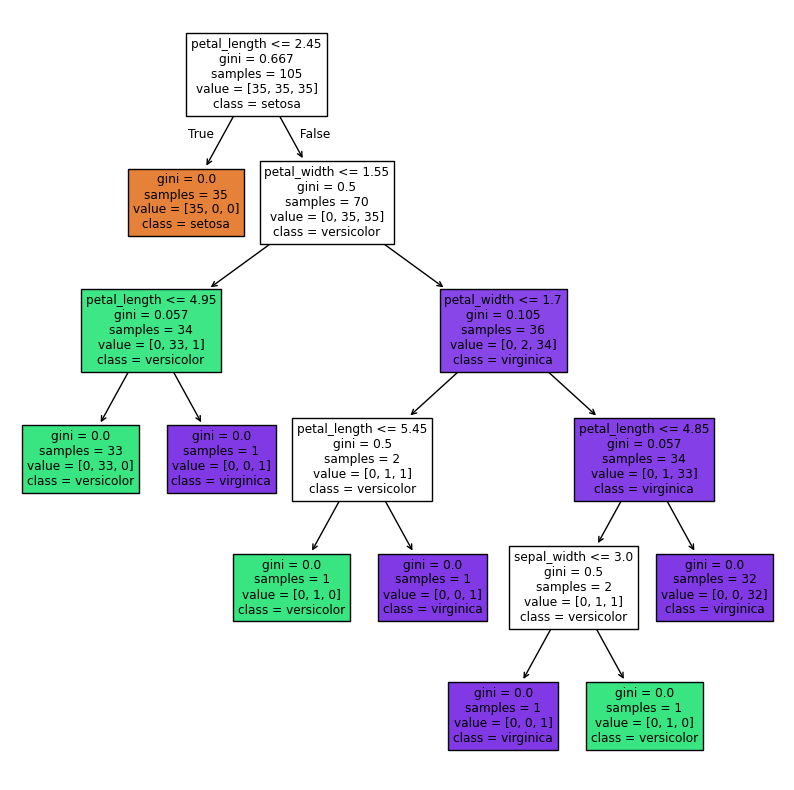

In [51]:
plt.figure(figsize=(10, 10))
_ = plot_tree(model, feature_names=feature_names, class_names=model.classes_, filled=True)

# Kriterijumi za model

Postavlja se pitanje kako da izaberemo parametre?
- Imali smo parametar koji se zove kriterijum i opcije su gini i entropija, kako da znamo koji da odabaremo?
- Imali smo parametar max_depth, kako to da znamo?

Da bi ovo mogli da znamo, treba uvesti validacioni skup (deo trening skupa) pomocu kojeg mozemo da validiramo rezultate. Zatim na tom skupu treba probati sve ove parametre. Ovo se zove **GridSearch**

Treba u iteracijama i probati razlicite validacione skupove (podaci se dele na foldove, jedan fold postaje test skup npr, a mozemo da setamo validacioni skup po ostalim foldovima).

Za manje skupove mozemo korisiti **Ugnjezdenu unakrsnu validaciju**, ovo je slozenosti $O(n^2)$ pa nije upotrebljivo za velike skupove.

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
params = {'criterion' : ['gini', 'entropy'],
          'max_depth': [2, 3, 4],
          'min_samples_leaf': [2,3]}

In [61]:
# Grid search isprobava sve kombinacije paramsa i nalazi najbolju
# Scoring kriterijum mozemo i sami da implementiramo kao funkciju
# cv nam definise broj foldova (broj podela skupa)
model = GridSearchCV(DecisionTreeClassifier(), param_grid=params, scoring='accuracy', cv=5, verbose=4)

In [62]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=2;, score=0.952 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=2;, score=0.952 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=2;, score=0.952 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=2;, score=0.905 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=2;, score=0.952 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=3;, score=0.952 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=3;, score=0.952 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=3;, score=1.000 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=3;, score=0.905 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=3;, score=0.952 total time=   0.0s

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, ...], 'min_samples_leaf': [2, 3]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,4
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [63]:
model.best_estimator_

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [64]:
model.best_score_

np.float64(0.9523809523809523)

In [65]:
y_pred = model.predict(X_test)

In [66]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 12,  3],
       [ 0,  2, 13]])

In [67]:
model.best_estimator_.feature_importances_

array([0.        , 0.        , 0.54448399, 0.45551601])

# KNN

Recimo da imamo dva atributa, neka se zovu A i B, i neka su klase + i -. Zamislimo da to iscrtamo na grafiku. u jednom delu grafika se nalaze "grupisani" objekti jedne glase, a u drugom delu grafika, objekti druge klase, naravno uz neke izuzetke. Recimo da treba da pogodimo kojoj klasi pripada nepoznati objekat negde u grafiku, intuitivno to je jednostavno jer samo gledamo cime je okruzen - npr. posmatramo k najblizih suseda. Ovaj algoritam ima i ime i zove **KNN - K Nearest Neighbours**.

Za razlicito K dobijacemo razlitice rezultate. Sto je K manje to gledamo lokalnije, a sto je vece gledamo gloablnije. Jasno je da je malo K nece dobro raditi, ali mozemo i preterati sa K. Za malo K dolazi do **preprilagodjavanja**.

Udaljenost je jako bitna - ne treba gledati samo k najblizih vec i udaljenosti tih suseda. Ti susedi imaju tezinu obrnuto srazmernu udaljenosti. Blizi susedi imaju vecu tezinu od udaljenijih. Treba gledati lokalno, ali ne previse usko i treba uzeti udaljenost suseda u obzir.

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
model =  KNeighborsClassifier()

In [70]:
model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [71]:
y_pred = model.predict(X_test)

In [72]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]])